<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# I. Libraries and data preparation

## 1. Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 2. Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
# Dropping "Unnamed: 0" (Assumably index)
boston_df = boston_df.drop(columns=['Unnamed: 0'])

### Check for missing values & duplicates and handle them if exist

In [4]:
# Check for missing values
missing_values = boston_df.isnull().sum()
print("Missing values per columns:")
print(missing_values)

Missing values per columns:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
# Check for duplicates
duplicates = boston_df[boston_df.duplicated()]
print(f'Duplicate rows: {len(duplicates)}')

Duplicate rows: 0


# II. Statistical Analysis With Visualizations And Hypothesis


## 1. Data Visualisation

### a. Median Value Of Owner-occupied Homes

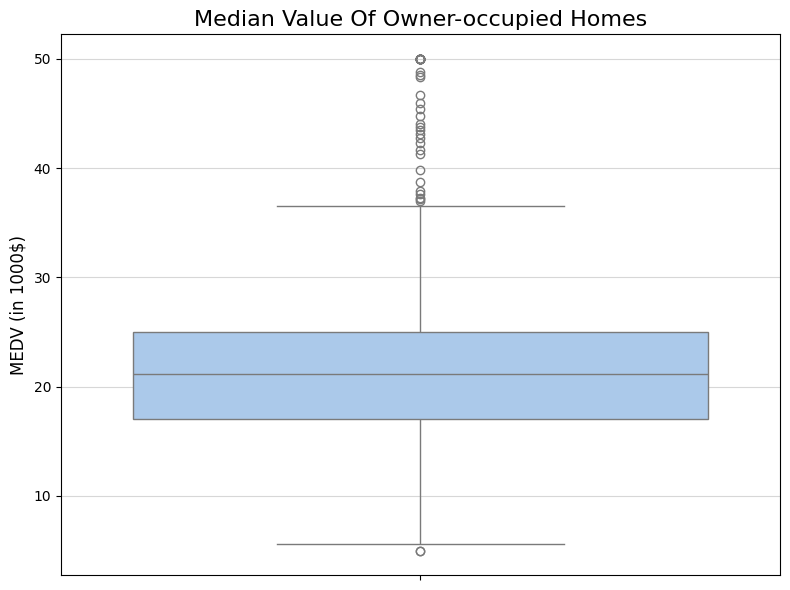

In [6]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create boxplot
sns.boxplot(boston_df['MEDV'], palette='pastel')

# Add title and label
plt.title('Median Value Of Owner-occupied Homes', fontsize=16)
plt.ylabel('MEDV (in 1000$)', fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

### b. Charles River Variable

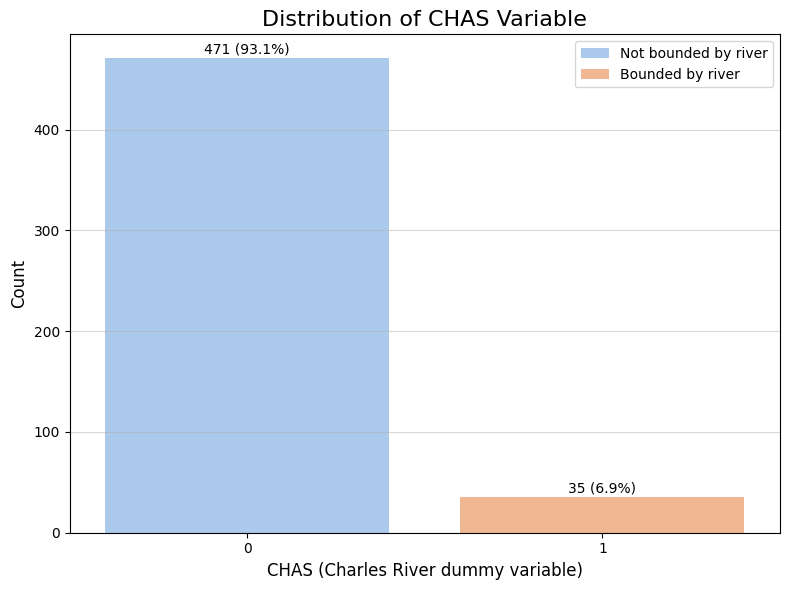

In [7]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create the barplot
sns.countplot(x='CHAS', palette='pastel', data=boston_df)

# Calculate percentages
counts = boston_df['CHAS'].value_counts()
total = counts.sum()
percentage_0 = (counts.get(0, 0) / total) * 100
percentage_1 = (counts.get(1, 0) / total) * 100

# Add count and percentage annotations to the bars
plt.text(0, counts.get(0, 0) + 5, f"{counts.get(0, 0)} ({percentage_0:.1f}%)", ha='center', fontsize=10)
plt.text(1, counts.get(1, 0) + 5, f"{counts.get(1, 0)} ({percentage_1:.1f}%)", ha='center', fontsize=10)

# Add title and labels
plt.title('Distribution of CHAS Variable', fontsize=16)
plt.xlabel('CHAS (Charles River dummy variable)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks([0, 1], ['0', '1'])
plt.grid(axis='y', alpha=0.5)
plt.legend(['Not bounded by river', 'Bounded by river'])
plt.tight_layout()
plt.show()

### c. MEDV variable vs the AGE variable

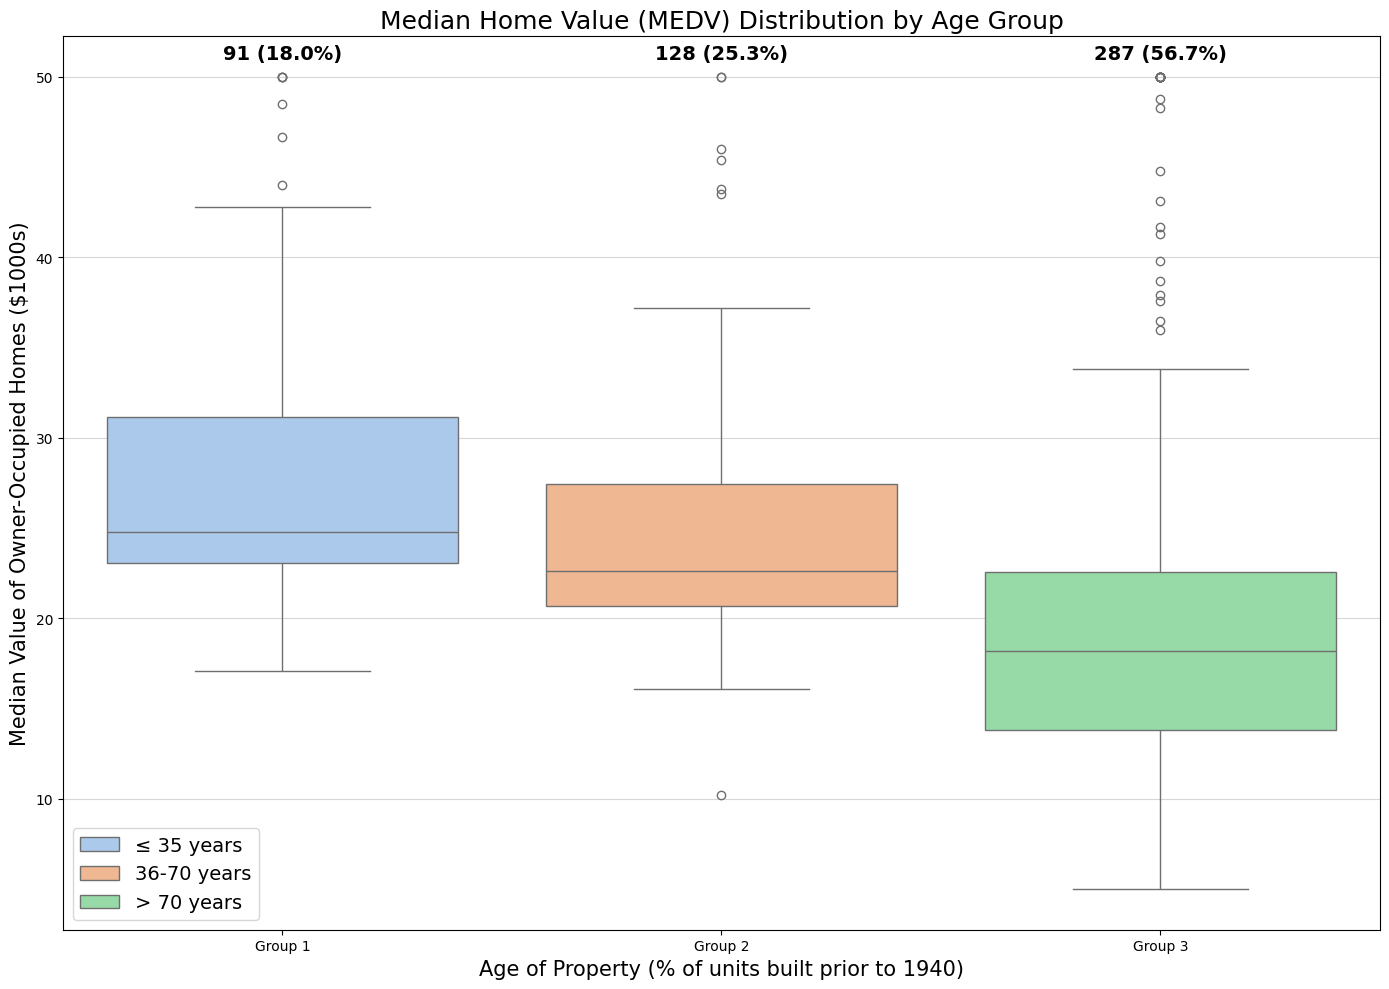

In [8]:
df_plot = boston_df.copy()

# Discretize the AGE variable into three groups
df_plot['AGE_GROUP'] = pd.cut(df_plot['AGE'], bins=[0, 35, 70, 100], labels=['≤ 35 years', '36-70 years', '> 70 years'])

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the boxplot
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df_plot, palette='pastel')

# Add title and labels
plt.title('Median Home Value (MEDV) Distribution by Age Group', fontsize=18)
plt.xlabel('Age of Property (% of units built prior to 1940)', fontsize=15)
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)', fontsize=15)

# Add counts and percentages above each group
total = len(df_plot)
for i, (name, group) in enumerate(df_plot.groupby('AGE_GROUP')):
    count = len(group)
    percentage = (count / total) * 100
    plt.text(i, df_plot['MEDV'].max() * 1.02, f'{count} ({percentage:.1f}%)', ha='center', fontsize=14, fontweight='bold')

plt.xticks([0, 1, 2], ['Group 1', 'Group 2', 'Group 3'])
plt.grid(axis='y', alpha=0.5)
plt.legend(['≤ 35 years', '36-70 years', '> 70 years'], fontsize=14)
plt.tight_layout()
plt.show()

### d. Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

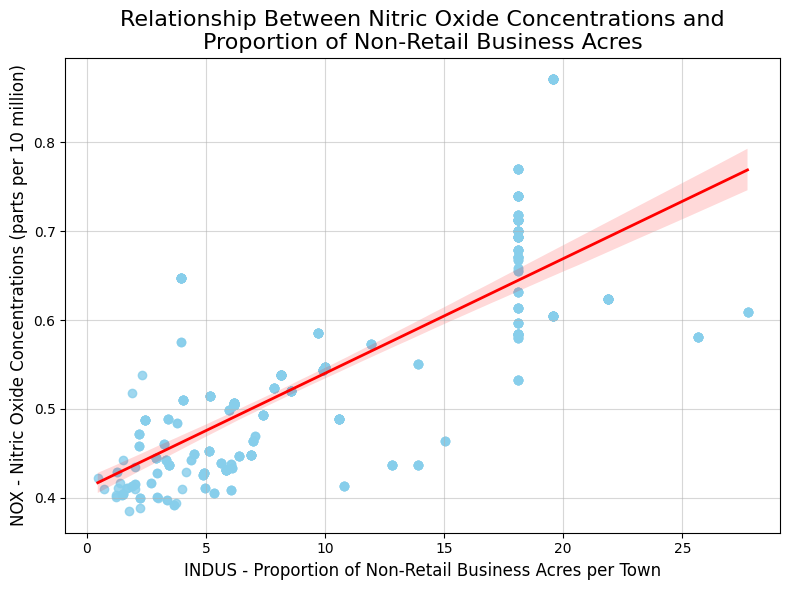

In [9]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create the scatterplot (Linear Regression)
sns.regplot(x='INDUS', y='NOX', color='skyblue', line_kws={'color': 'red', 'linewidth': 2}, data=boston_df)

# Add title and labels
plt.title('Relationship Between Nitric Oxide Concentrations and\nProportion of Non-Retail Business Acres', fontsize=16)
plt.xlabel('INDUS - Proportion of Non-Retail Business Acres per Town', fontsize=12)
plt.ylabel('NOX - Nitric Oxide Concentrations (parts per 10 million)', fontsize=12)

plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

### e. Pupil to teacher ratio

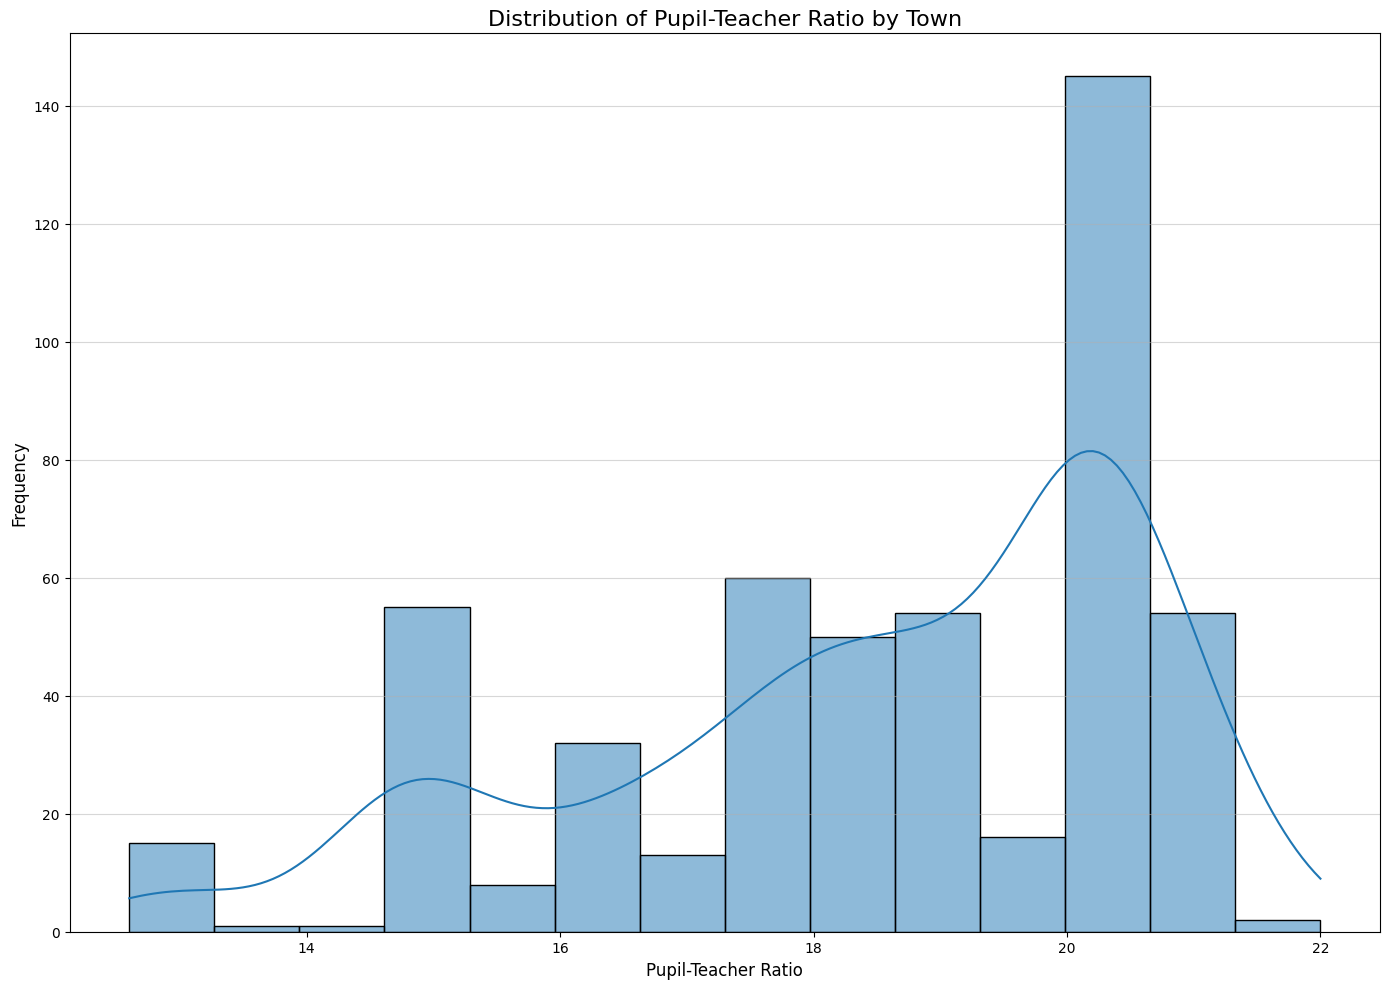

In [10]:
# Set figure size
plt.figure(figsize=(14, 10))

# Create the historgram
sns.histplot(x='PTRATIO', data=boston_df, kde=True)

# Add title and labels
plt.title('Distribution of Pupil-Teacher Ratio by Town', fontsize=16)
plt.xlabel('Pupil-Teacher Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## 2. Hypothesis And Statistical Analysis

In [11]:
# Create a copy of the dataframe to avoid modifying the original
df = boston_df.copy()

### a. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis:
* H0: There is no difference in median home values between properties bounded by the Charles River and those not bounded by it.
* H1: There is a significant difference in median home values between properties bounded by the Charles River and those not bounded by it.
  
Significance level: α = 0.05

Summary Statistics:

Properties bounded by Charles River (CHAS = 1):
count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64
Number of samples: 35

Properties not bounded by Charles River (CHAS = 0):
count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64
Number of samples: 471

Levene's Test for Equal Variances:
Statistic: 4.5903
p-value: 0.0326
Equal variances: No

Performing Welch's t-test (unequal variances):
t-statistic: 3.1133
p-value: 0.0036


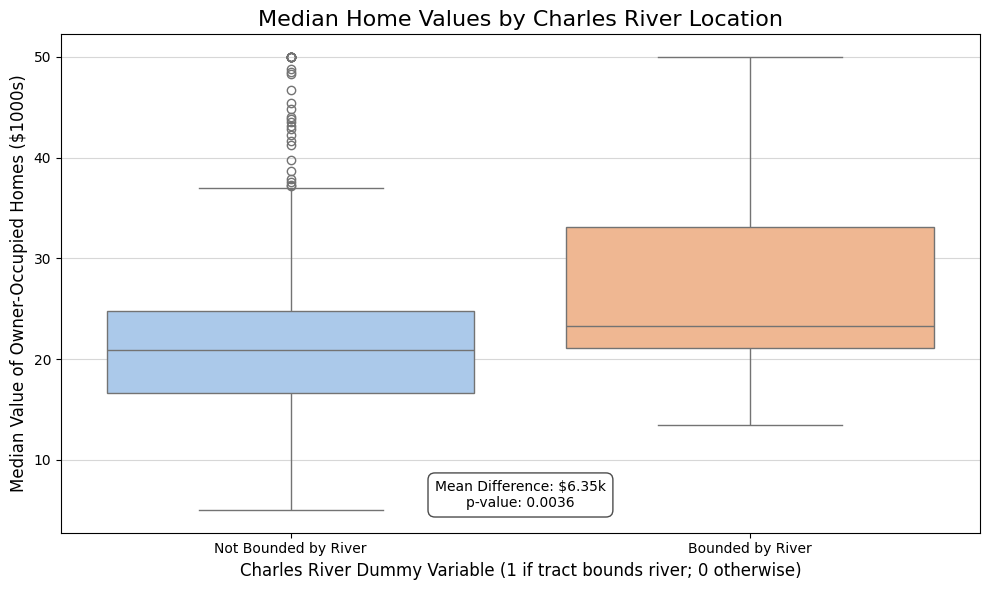

In [12]:
# Extract the two groups based on CHAS
river_group = df[df['CHAS'] == 1]['MEDV']
non_river_group = df[df['CHAS'] == 0]['MEDV']

# Display summary statistics for each group
print("Summary Statistics:")
print("\nProperties bounded by Charles River (CHAS = 1):")
print(river_group.describe())
print(f"Number of samples: {len(river_group)}")

print("\nProperties not bounded by Charles River (CHAS = 0):")
print(non_river_group.describe())
print(f"Number of samples: {len(non_river_group)}")

# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(river_group, non_river_group)
print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {levene_stat:.4f}")
print(f"p-value: {levene_p:.4f}")
print(f"Equal variances: {'Yes' if levene_p > 0.05 else 'No'}")

# Perform t-test
if levene_p > 0.05:
    # Equal variances
    t_stat, p_value = stats.ttest_ind(river_group, non_river_group, equal_var=True)
    test_type = "Student's t-test (equal variances)"
else:
    # Unequal variances
    t_stat, p_value = stats.ttest_ind(river_group, non_river_group, equal_var=False)
    test_type = "Welch's t-test (unequal variances)"

print(f"\nPerforming {test_type}:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Visualize the difference
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', palette='pastel', data=df)
plt.title('Median Home Values by Charles River Location', fontsize=16)
plt.xlabel('Charles River Dummy Variable (1 if tract bounds river; 0 otherwise)', fontsize=12)
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)', fontsize=12)
plt.xticks([0, 1], ['Not Bounded by River', 'Bounded by River'])
mean_diff = river_group.mean() - non_river_group.mean()
plt.annotate(f"Mean Difference: ${mean_diff:.2f}k\np-value: {p_value:.4f}",
             xy=(0.5, df['MEDV'].min()),
             ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#### Conclusion:
* Since p-value (0.0036) < α (0.05), we reject the null hypothesis.
* There is a statistically significant difference in median home values between properties bounded by the Charles River and those not bounded by it.
* Properties bounded by the Charles River have significantly higher median values (28.44k vs 22.09k).

### b. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### Hypothesis:
* H0: There is no difference in median home values among the different age groups of properties.
* H1: There is a significant difference in median home values among at least two age groups of properties.

Significance level: α = 0.05

Summary Statistics by Age Group:
             count       mean       std   min     25%   50%     75%   max
AGE_GROUP                                                                
≤ 35 years    91.0  27.775824  7.638198  17.1  23.050  24.8  31.150  50.0
36-70 years  128.0  24.947656  6.969370  10.2  20.675  22.6  27.425  50.0
> 70 years   287.0  19.793380  9.515375   5.0  13.800  18.2  22.550  50.0

ANOVA Results:
F-statistic: 36.4076
p-value: 0.0000


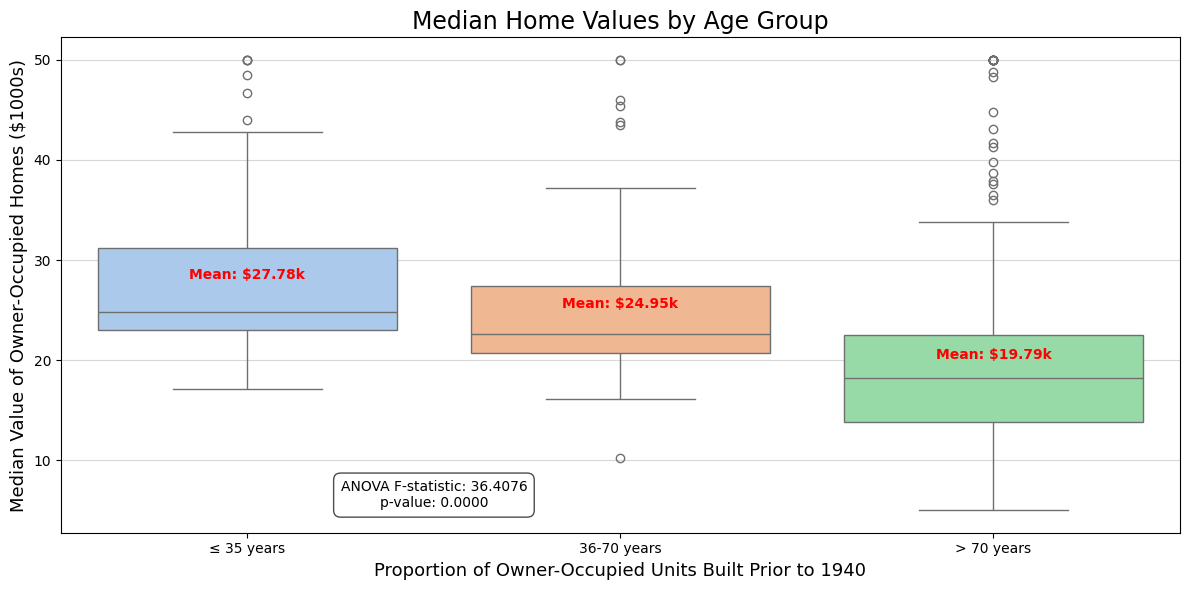


Tukey HSD Post-hoc Test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
36-70 years > 70 years  -5.1543    0.0 -7.3062 -3.0024   True
36-70 years ≤ 35 years   2.8282 0.0447   0.052  5.6043   True
 > 70 years ≤ 35 years   7.9824    0.0  5.5467 10.4182   True
-------------------------------------------------------------


In [13]:
# Discretize the AGE variable into three groups
df['AGE_GROUP'] = pd.cut(df['AGE'], 
                         bins=[0, 35, 70, 100], 
                         labels=['≤ 35 years', '36-70 years', '> 70 years'])

# Display summary statistics for each group
print("Summary Statistics by Age Group:")
age_group_stats = df.groupby('AGE_GROUP')['MEDV'].describe()
print(age_group_stats)

# Perform one-way ANOVA
groups = [group['MEDV'].values for name, group in df.groupby('AGE_GROUP')]
f_stat, p_value = stats.f_oneway(*groups)

print("\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Visualize the groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', palette='pastel', data=df)
plt.title('Median Home Values by Age Group', fontsize=17)
plt.xlabel('Proportion of Owner-Occupied Units Built Prior to 1940', fontsize=13)
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)', fontsize=13)
plt.annotate(f"ANOVA F-statistic: {f_stat:.4f}\np-value: {p_value:.4f}",
             xy=(0.5, df['MEDV'].min()),
             ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))
plt.grid(axis='y', alpha=0.5)

# Add group means
for i, (name, group) in enumerate(df.groupby('AGE_GROUP')):
    plt.text(i, group['MEDV'].mean(), f"Mean: ${group['MEDV'].mean():.2f}k", 
             ha='center', va='bottom', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# If ANOVA is significant, conduct post-hoc Tukey HSD test
if p_value < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog=df['MEDV'], groups=df['AGE_GROUP'], alpha=0.05)
    print("\nTukey HSD Post-hoc Test:")
    print(tukey)

#### Conclusion:
* Since p-value (0.0000) < α (0.05), we reject the null hypothesis.
* There is a statistically significant difference in median home values among different age groups of properties.
* The ≤ 35 years group has the highest mean value (\$27.78k).
* The > 70 years group has the lowest mean value ($19.79k).

Significant pairwise differences (based on Tukey HSD test):
* 36-70 years vs > 70 years: Mean difference = \$-5.15k, p-adj = 0.0000
* 36-70 years vs ≤ 35 years: Mean difference = \$2.83k, p-adj = 0.0447
* \> 70 years vs ≤ 35 years: Mean difference = $7.98k, p-adj = 0.0000

### c. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### Hypothesis:
* H0: There is no correlation between nitric oxide concentrations and proportion of non-retail business acres per town (ρ = 0).
* H1: There is a significant correlation between nitric oxide concentrations and proportion of non-retail business acres per town (ρ ≠ 0).

Significance level: α = 0.05

Correlation Analysis:
Pearson correlation coefficient (r): 0.7637
Coefficient of determination (r²): 0.5832
p-value: 0.0000


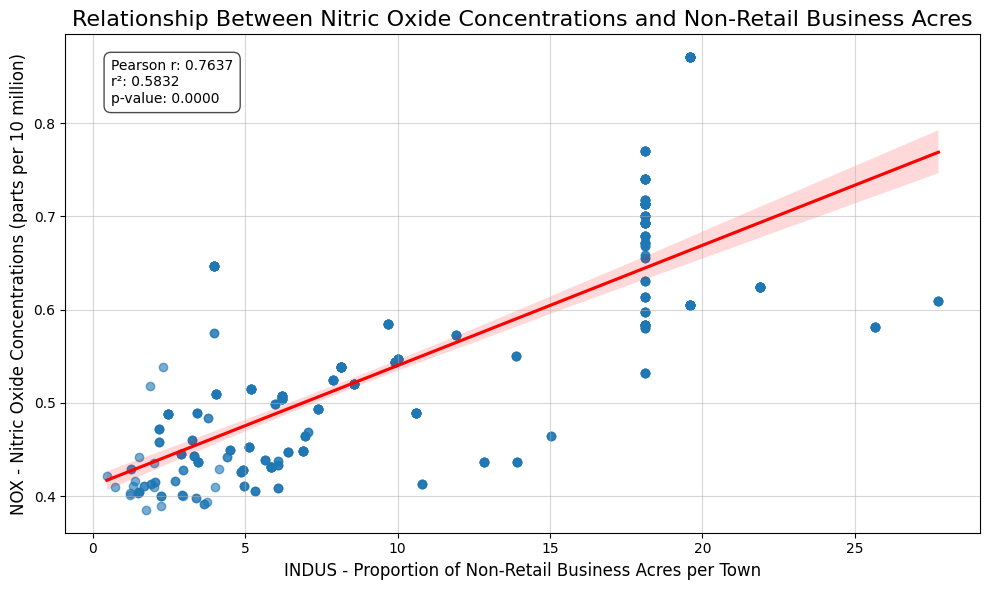

In [14]:
# Calculate Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(df['INDUS'], df['NOX'])
r_squared = correlation**2

print("Correlation Analysis:")
print(f"Pearson correlation coefficient (r): {correlation:.4f}")
print(f"Coefficient of determination (r²): {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='INDUS', y='NOX', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship Between Nitric Oxide Concentrations and Non-Retail Business Acres', fontsize=16)
plt.xlabel('INDUS - Proportion of Non-Retail Business Acres per Town', fontsize=12)
plt.ylabel('NOX - Nitric Oxide Concentrations (parts per 10 million)', fontsize=12)
plt.annotate(f"Pearson r: {correlation:.4f}\nr²: {r_squared:.4f}\np-value: {p_value:.4f}",
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7),
             va='top')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

#### Conclusion:
* Since p-value (0.0000) < α (0.05), we reject the null hypothesis.
* There is a statistically significant correlation between nitric oxide concentrations and proportion of non-retail business acres per town.
* The correlation is strong and positive (r = 0.7637).
* About 58.32% of the variation in nitric oxide concentrations can be explained by the proportion of non-retail business acres.

### d. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Hypothesis:
* H0: There is no significant relationship between weighted distances to employment centres and median home values (β1 = 0).
* H1: There is a significant relationship between weighted distances to employment centres and median home values (β1 ≠ 0).

Significance level: α = 0.05

Regression Analysis Results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        23:33:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901  

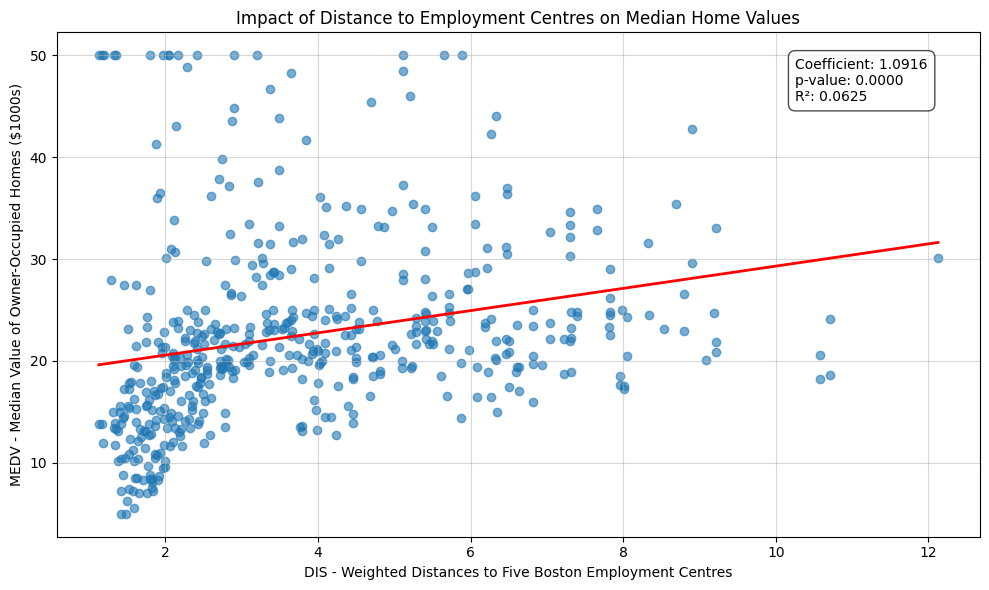

In [15]:
# Create a simple linear regression model
X = df['DIS']
y = df['MEDV']

# Add constant to predictor variables
X_with_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_with_const).fit()

# Print the regression results summary
print("Regression Analysis Results:")
print(model.summary())

# Extract the coefficient for DIS
dis_coef = model.params['DIS']
dis_pvalue = model.pvalues['DIS']
r_squared = model.rsquared

# Calculate predictions for plotting
x_line = np.linspace(X.min(), X.max(), 100)
x_line_with_const = sm.add_constant(x_line)
y_pred = model.predict(x_line_with_const)

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6)
plt.plot(x_line, y_pred, color='red', linewidth=2)
plt.title('Impact of Distance to Employment Centres on Median Home Values')
plt.xlabel('DIS - Weighted Distances to Five Boston Employment Centres')
plt.ylabel('MEDV - Median Value of Owner-Occupied Homes ($1000s)')
plt.annotate(f"Coefficient: {dis_coef:.4f}\np-value: {dis_pvalue:.4f}\nR²: {r_squared:.4f}",
             xy=(0.80, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7),
             va='top')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

#### Conclusion:
* Since p-value (0.0000) < α (0.05), we reject the null hypothesis.
* There is a statistically significant relationship between weighted distances to employment centres and median home values.
* For each additional unit increase in weighted distance to employment centres, median home values increase by $1.09k on average, holding all other factors constant.
* The model explains 6.25% of the variability in median home values.

# Author
**Duong Nguyen**